In [2]:
from google.colab import files


uploaded = files.upload()

Saving Crop_recommendation.csv to Crop_recommendation.csv


In [4]:
!pip install ipympl


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.5 MB/s eta 0:00:00


In [5]:
%matplotlib inline


In [1]:
# for manipulations
import numpy as np
import pandas as pd

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for interactivity
from ipywidgets import interact

%matplotlib widget


In [2]:
df = pd.read_csv("Crop_recommendation.csv")

In [3]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [11]:
# Lets check the shape
df.shape

(2200, 8)

In [12]:
df.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [13]:
# Check for missing value
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [14]:
df.label.value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [15]:
# Summary for all Crops.
print("   Average Ratio of Nitrogen in the Soil : {0:.2f}".format(df.N.mean()))
print("Average Ratio of Phosphorous in the Soil : {0:.2f}".format(df.P.mean()))
print("  Average Ratio of Potassium in the Soil : {0:.2f}".format(df.K.mean()))
print("          Average Temperature in Celsius : {0:.2f}".format(df.temperature.mean()))
print("               Average Relative Humidity : {0:.2f}".format(df['humidity'].mean()))
print("            Average PH Value of the Soil : {0:.2f}".format(df['ph'].mean()))
print("                  Average Rainfall in mm : {0:.2f}".format(df['rainfall'].mean()))

   Average Ratio of Nitrogen in the Soil : 50.55
Average Ratio of Phosphorous in the Soil : 53.36
  Average Ratio of Potassium in the Soil : 48.15
          Average Temperature in Celsius : 25.62
               Average Relative Humidity : 71.48
            Average PH Value of the Soil : 6.47
                  Average Rainfall in mm : 103.46


In [4]:
# Summary Statistics for each of the Crops

@interact
def summary(crops = list(df['label'].value_counts().index)):
    x = df[df['label'] == crops]

    print("-"*30)
    print("STatistics for Nitrogen")
    print("Minimum Nitrogen required : ", x['N'].min())
    print("Average Nitrogen required : ", x['N'].mean())
    print("Maxiumm Nitrogen required : ", x['N'].max())

    print("-"*30)
    print("STatistics for Phosphorous")
    print("Minimum Phosphorous required : ", x['P'].min())
    print("Average Phosphorous required : ", x['P'].mean())
    print("Maxiumm Phosphorous required : ", x['P'].max())

    print("-"*30)
    print("STatistics for Potassium")
    print("Minimum Potassium required : ", x['K'].min())
    print("Average Potassium required : ", x['K'].mean())
    print("Maxiumm Potassium required : ", x['K'].max())

    print("-"*30)
    print('Similar for other features')

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [5]:
def summary(crops):
    x = df[df['label'] == crops]

    print("-"*30)
    print("STatistics for Nitrogen")
    print("Minimum Nitrogen required : ", x['N'].min())
    print("Average Nitrogen required : ", x['N'].mean())
    print("Maxiumm Nitrogen required : ", x['N'].max())

    print("-"*30)
    print("STatistics for Phosphorous")
    print("Minimum Phosphorous required : ", x['P'].min())
    print("Average Phosphorous required : ", x['P'].mean())
    print("Maxiumm Phosphorous required : ", x['P'].max())

    print("-"*30)
    print("STatistics for Potassium")
    print("Minimum Potassium required : ", x['K'].min())
    print("Average Potassium required : ", x['K'].mean())
    print("Maxiumm Potassium required : ", x['K'].max())

    print("-"*30)
    print('Similar for other features')

interact(summary, crops = list(df['label'].value_counts().index) );

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [6]:
# Compare the Average Requirement fr each crops with average condition

all_features = list(df.columns.values)
# all_features = list(df.columns.values.tolist())
# type(all_features)

@interact
def compare(conditions = all_features):
    print("Average Value for ", conditions, "is {0:.2f}".format(df[conditions].mean()))
    print('-'*40)
    print("Rice  : {0:.2f}".format(df[(df['label'] == 'rice')][conditions].mean()))
    print("watermelon : {0:.2f}".format(df[(df['label'] == 'watermelon')][conditions].mean()))
    print("Mango : {0:.2f}".format(df[(df['label'] == 'mango')][conditions].mean()))
    print('Similar for other Crops....')

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

In [7]:
# Lets make this function more Intuitive

@interact
def compare(conditions = ['N', 'P', 'K', 'temperature','ph', 'rainfall']):
    print("Crops which require greater than average", conditions, '\n')
    print(df[df[conditions] > df[conditions].mean()]['label'].unique())
    print('*'*40)
    print("Crops which require less than avergae", conditions, '\n')
    print(df[df[conditions] <= df[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'rainfal…

In [23]:
from google.colab import output
output.enable_custom_widget_manager()

C:\Users\siddh\AppData\Local\Temp\ipykernel_17352\2539424470.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['N'], color = 'darkblue')
C:\Users\siddh\AppData\Local\Temp\ipykernel_17352\2539424470.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['P'], color = 'darkblue')
C:\Users\sid

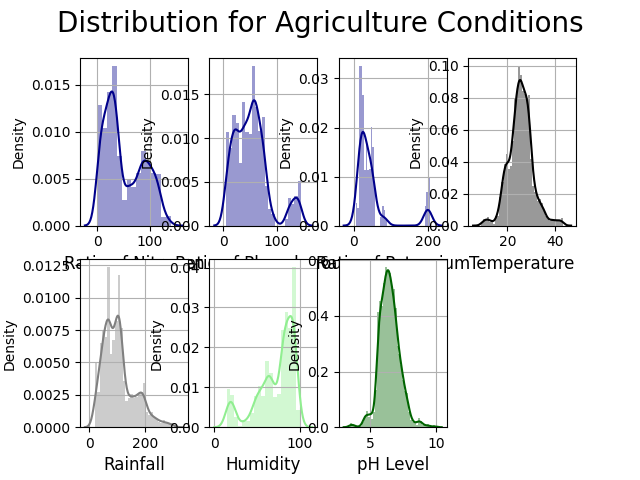

In [8]:
plt.subplot(2,4,1)
sns.distplot(df['N'], color = 'darkblue')
plt.xlabel("Ratio of Nitrogen", fontsize = 12)
plt.grid()

plt.subplot(2,4,2)
sns.distplot(df['P'], color = 'darkblue')
plt.xlabel("Ratio of Phosphorous", fontsize = 12)
plt.grid()


plt.subplot(2,4,3)
sns.distplot(df['K'], color = 'darkblue')
plt.xlabel("Ratio of Potassium", fontsize = 12)
plt.grid()

plt.subplot(2,4,4)
sns.distplot(df['temperature'], color = 'black')
plt.xlabel("Temperature", fontsize = 12)
plt.grid()

plt.subplot(2,4,5)
sns.distplot(df['rainfall'], color = 'grey')
plt.xlabel("Rainfall", fontsize = 12)
plt.grid()

plt.subplot(2,4,6)
sns.distplot(df['humidity'], color = 'lightgreen')
plt.xlabel("Humidity", fontsize = 12)
plt.grid()

plt.subplot(2,4,7)
sns.distplot(df['ph'], color = 'darkgreen')
plt.xlabel("pH Level", fontsize = 12)
plt.grid()

plt.suptitle("Distribution for Agriculture Conditions", fontsize = 20)
plt.show()

In [9]:
## Lets find out some interesting facts

print("Crops which requires very high ratio of Nitrogen content in Soil : ", df[df['N'] > 120]['label'].unique())
print("Crops which requires very high ratio of Phosphorous content in Soil : ", df[df['P'] > 100]['label'].unique())
print("Crops which requires very high ratio of Potassium content in Soil : ", df[df['K'] > 200]['label'].unique())
print("                          Crops which requires very high Rainfall : ", df[df['rainfall'] > 200]['label'].unique())
print("                          Crops which requires very low temperature : ", df[df['temperature'] < 10]['label'].unique())
print("                          Crops which requires very high temperature : ", df[df['temperature'] > 40]['label'].unique())
print("                          Crops which requires very low humidity : ", df[df['humidity'] < 20]['label'].unique())
print("                          Crops which requires very low ph : ", df[df['ph'] < 4]['label'].unique())
print("                          Crops which requires very high ph : ", df[df['ph'] > 9]['label'].unique())

Crops which requires very high ratio of Nitrogen content in Soil :  ['cotton']
Crops which requires very high ratio of Phosphorous content in Soil :  ['grapes' 'apple']
Crops which requires very high ratio of Potassium content in Soil :  ['grapes' 'apple']
                          Crops which requires very high Rainfall :  ['rice' 'papaya' 'coconut']
                          Crops which requires very low temperature :  ['grapes']
                          Crops which requires very high temperature :  ['grapes' 'papaya']
                          Crops which requires very low humidity :  ['chickpea' 'kidneybeans']
                          Crops which requires very low ph :  ['mothbeans']
                          Crops which requires very high ph :  ['mothbeans']


In [26]:
from google.colab import output
output.enable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [27]:
from google.colab import output
output.disable_custom_widget_manager()

In [10]:
# Lets understand which crops can only be grown in SUmmer season; winter season; rainy season

print("Summer Crops -->")
print(df[(df['temperature'] > 30) & (df['humidity'] > 50 )]['label'].unique())
print('*'*50)

print("Winter Crops -->")
print(df[(df['temperature'] < 20) & (df['humidity'] > 30 )]['label'].unique())
print('*'*50)

print("Rainy Crops -->")
print(df[(df['rainfall'] > 200) & (df['humidity'] > 30 )]['label'].unique())
print('*'*50)

Summer Crops -->
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
**************************************************
Winter Crops -->
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
**************************************************
Rainy Crops -->
['rice' 'papaya' 'coconut']
**************************************************


In [11]:
from sklearn.cluster import KMeans

In [12]:
# Removing the label column
X = df.drop(['label'], axis = 1)

In [13]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [14]:
# Selecting all the values.. output will be of ndarray.
X = X.values


In [15]:
X[:2]

array([[ 90.        ,  42.        ,  43.        ,  20.87974371,
         82.00274423,   6.50298529, 202.9355362 ],
       [ 85.        ,  58.        ,  41.        ,  21.77046169,
         80.31964408,   7.03809636, 226.6555374 ]])

In [16]:
# Lets determine the optimum number of Clusters within the DataSet.

plt.rcParams['figure.figsize'] = (10,4)

wcss = []

for i in range(1,11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(X)
    wcss.append(km.inertia_)
    print("Iteration ", i, " Done.")

Iteration  1  Done.
Iteration  2  Done.
Iteration  3  Done.
Iteration  4  Done.
Iteration  5  Done.
Iteration  6  Done.
Iteration  7  Done.
Iteration  8  Done.
Iteration  9  Done.
Iteration  10  Done.


In [17]:
print(wcss)

[18820170.46364589, 12070916.353533508, 7423970.865410898, 5337358.560746387, 4417511.1167682065, 3748642.3531599212, 3103936.6816232046, 2727858.0937568448, 2374253.742476347, 2130935.162281192]


In [18]:
from sklearn.cluster import KMeans

# Assuming you are creating a KMeans object somewhere in your code
# Explicitly specify the n_init parameter
kmeans = KMeans(n_clusters=3, n_init=10)


In [19]:
from google.colab import output
output.enable_custom_widget_manager()

ModuleNotFoundError: No module named 'google.colab'

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


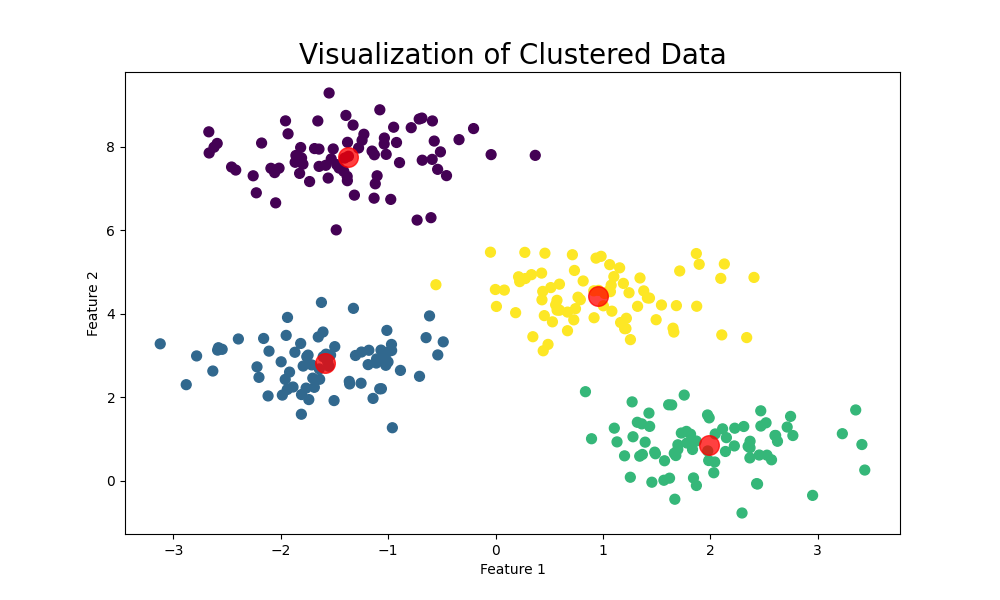

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Apply k-means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)  # mark the centroids
plt.title("Visualization of Clustered Data", fontsize=20)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [20]:
# Lets implement the K means algorithm to perform clustering analysis.

km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(X)

# Lets find out the Results
a = df['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns = {0:'Cluster'})

z.head()

,Cluster,label
0,3,rice
1,3,rice
2,3,rice
3,3,rice
4,3,rice


In [74]:
# Lets implement the K means algorithm to perform clustering analysis.

km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(X)

# Lets find out the Results
a = df['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns = {0:'Cluster'})

z.head()

,Cluster,label
0,0.0,rice
1,2.0,rice
2,1.0,rice
3,2.0,rice
4,0.0,rice


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Cluster'].plot(kind='hist', bins=20, title='Cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='index', y='Cluster', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Cluster']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Cluster')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Cluster'].plot(kind='line', figsize=(8, 4), title='Cluster')
plt.gca().spines[['top', 'right']].set_visible(False)

NameError: name '_df_3' is not defined

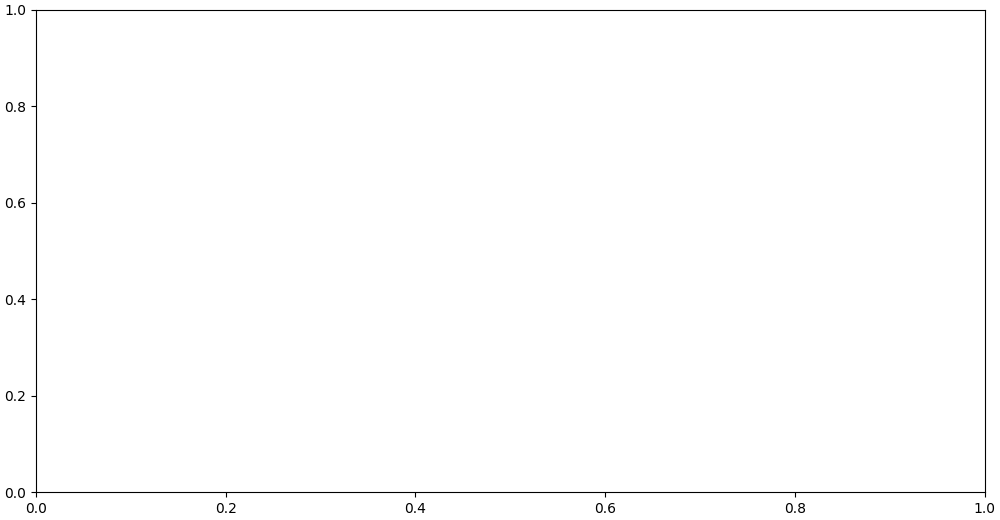

In [24]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Cluster']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Cluster')

In [ ]:
# Lets check the CLuster of each crops
print("Lets check the Results After Applying the K Means Clustering Analysis \n")
print("Crops in First Cluster : ", z[z['Cluster'] == 0]['label'].unique())
print('-'*50)

print("Crops in Second Cluster : ", z[z['Cluster'] == 1]['label'].unique())
print('-'*50)

print("Crops in Third Cluster : ", z[z['Cluster'] == 2]['label'].unique())
print('-'*50)

print("Crops in Fourth Cluster : ", z[z['Cluster'] == 3]['label'].unique())
print('-'*50)

In [53]:
# Lets split the datase
X = df.drop(['label'], axis = 1)
y = df['label']

X.shape, y.shape

((2200, 7), (2200,))

In [51]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = .2, random_state = 0)

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
# model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
# model = LogisticRegression(solver='lbfgs', multi_class='multinomial')
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [57]:
y_pred = model.predict(X_valid)

In [58]:
from sklearn.metrics import confusion_matrix

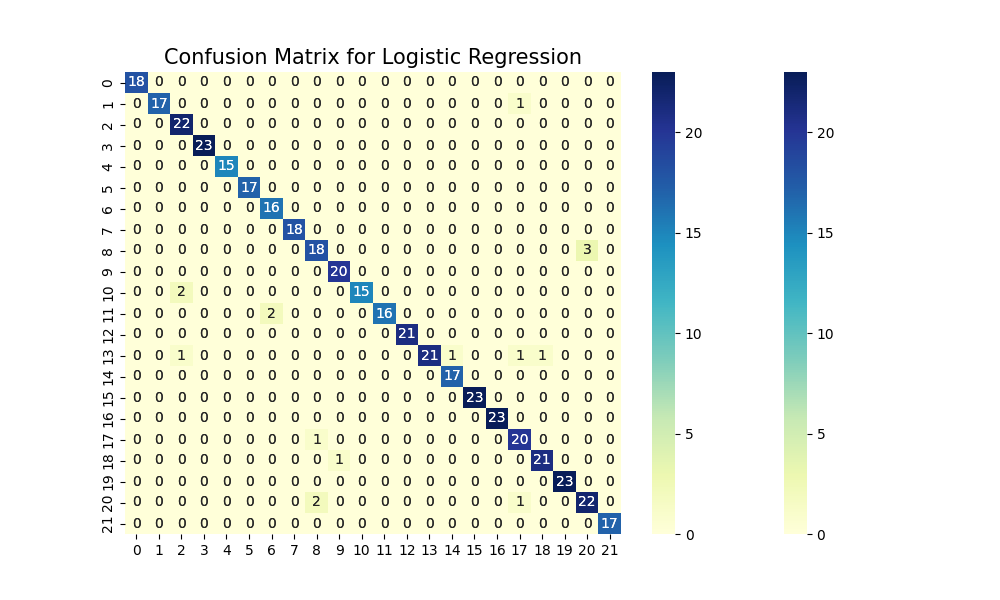

In [61]:
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu')
plt.title("Confusion Matrix for Logistic Regression", fontsize = 15)
plt.show()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [65]:
from google.colab import output
output.enable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [66]:
from sklearn.metrics import classification_report

In [67]:
# Lets print classification Report
cr = classification_report(y_valid, y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      0.94      0.97        18
   blackgram       0.88      1.00      0.94        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.86      0.86      0.86        21
 kidneybeans       0.95      1.00      0.98        20
      lentil       1.00      0.88      0.94        17
       maize       1.00      0.89      0.94        18
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      0.84      0.91        25
    mungbean       0.94      1.00      0.97        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       0.87    

In [69]:
from google.colab import output
output.enable_custom_widget_manager()

In [71]:
pred = model.predict(
    (
        np.array(
            [
                [
                    90,   # Value for N
                    40,   # Value for P
                    40,   # Value for K
                    20,   # Value for Temp
                    80,   # Value for Humidity
                    7,    # Value for pH
                    200   # Value for Rainfall
                    # Expected is "Rice"
                ]
            ]
        )
    )
)

print("The Suggested Crop for Given Climatic Condition is ", pred)

The Suggested Crop for Given Climatic Condition is  ['rice']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Support for third party widgets will remain active for the duration of the session. To disable support:

Support for third party widgets will remain active for the duration of the session. To disable support: